Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data collection and processing

In [5]:
#data loading into pandas data frame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
#printing the first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#printing the nubmer of rows and columns
customer_data.shape

(200, 5)

In [8]:
#getting more infromation about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#checking the number of null values in a row
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing annual income and spending score column

In [10]:
#to print a list of values containing all rows and 3rd and 4th column
x = customer_data.iloc[:,[3,4]].values

In [11]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

choosing the number of clusters

The Elbow Method is a popular technique used for this purpose in K-Means clustering to find the optimal value of k(clusters).

The Elbow Method helps us find this optimal k value.

- We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter you choose).
- For each k, we calculate the Within-Cluster Sum of Squares (WCSS).

- We calculate a distance measure called WCSS (Within-Cluster Sum of Squares). This tells us how spread out the data points are within each cluster.
- We try different k values (number of clusters). For each k, we run KMeans and calculate the WCSS.
- We plot a graph with k on the X-axis and WCSS on the Y-axis.
- Identifying the Elbow Point: As we increase kkk, the WCSS typically decreases - because we’re creating more clusters, which tend to capture more data variations. However, there comes a point where adding more clusters results in only a marginal decrease in WCSS. This is where we observe an “elbow” shape in the graph.


- Before the elbow: Increasing k significantly reduces WCSS, indicating that new clusters effectively capture more of the data’s variability.
- After the elbow: Adding more clusters results in a minimal reduction in WCSS, suggesting that these extra clusters may not be necessary and could lead to overfitting.

WCSS --> within clusters sum of squares

In [12]:
#finding wcss value for different number of cluster

wcss=[] #inertia

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  #kmeans_inertia calculates WCSS for the current state of the k-Means clustering model
  wcss.append(kmeans.inertia_)

In [13]:
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


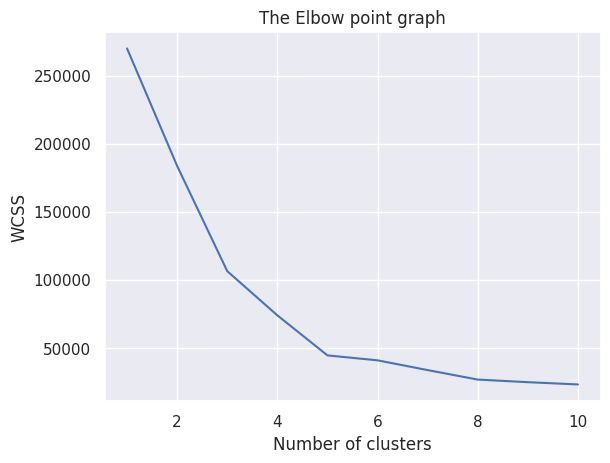

In [14]:
#plot a elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 5

training the k-means clustering model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster

y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


visiulaizing all the clusters

x[y==0, 0]: Selects the first feature (x-coordinate) of all data points that are assigned to Cluster 1 (where the cluster label is 0 in the array y).

x[y==0, 1]: Selects the second feature (y-coordinate) of those same data points.

s=50: Sets the size of the plotted points to 50. Larger values make the points bigger in the plot.

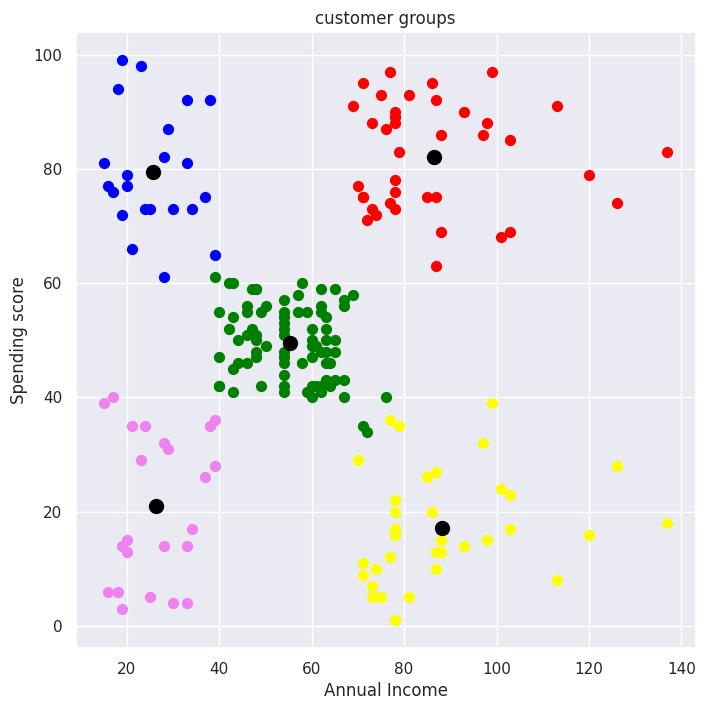

In [22]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='cluster 1')

plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='cluster 2')

plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='cluster 3')

plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='cluster 4')

plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')

plt.title("customer groups")
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()